# 145053 : Eunice Mutahi

# DSA 8401: Applied Machine Learning : Assignment #1


In [261]:
#load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [262]:
#import the dataset
df=pd.read_csv("ahds.csv")
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Exploratory Data analysis on the Data

In [263]:
#summary of the variable types
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [264]:
#Shape of the dataset
df.shape


(2930, 82)

The data has 2930 observations and 82 features

In [265]:
# Statistical summaries of the numeric features in the dataset
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [266]:
#Any missing values? How many
df.isna().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [267]:
df['Lot Frontage'].describe()

count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

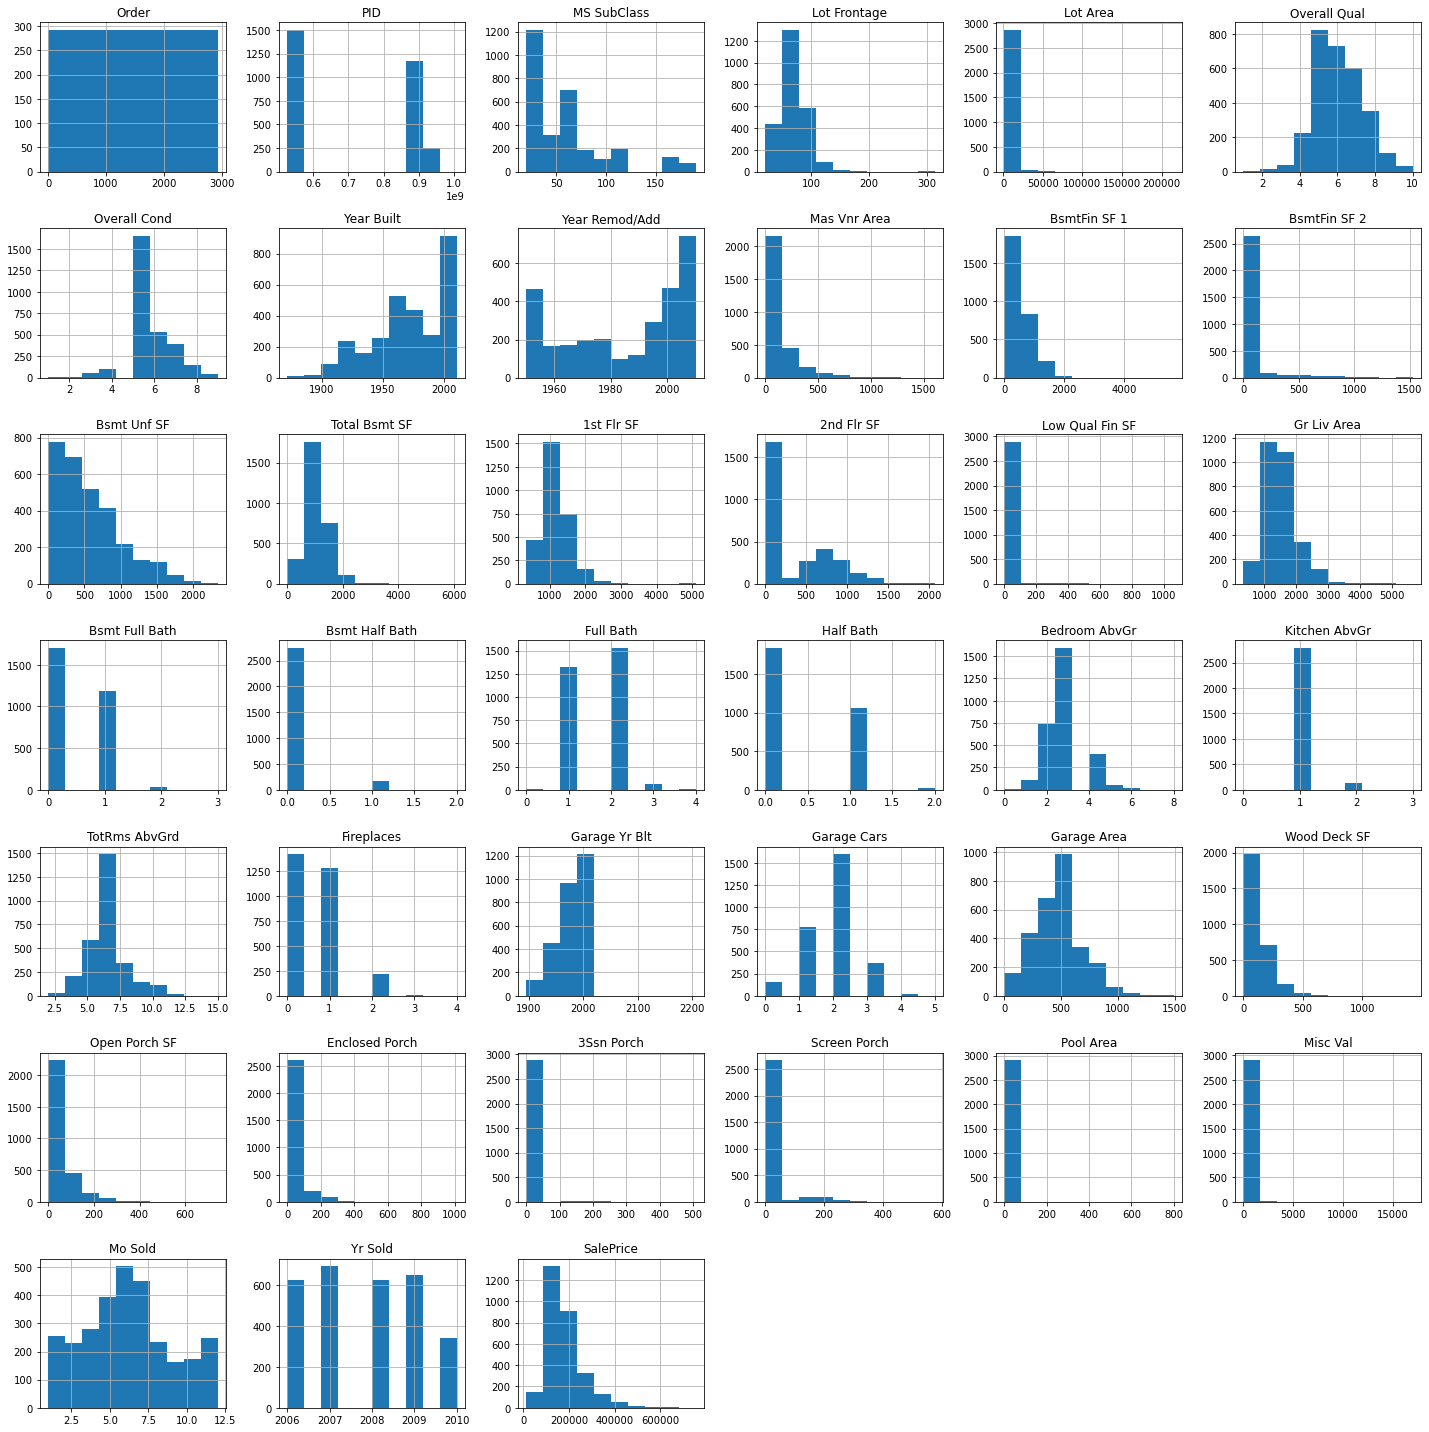

In [268]:
# Distribution of all the numeric features
df.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

In [269]:
# Check number of duplicates

In [270]:
# Get the number of categorical features
categorical=[c for i,c in enumerate(df.columns) if df.dtypes[i] in [object]]
categorical
len(categorical)


43

In [271]:
# similar to above
#cat_cols = [col for col in df.columns if col not in df.describe().columns]
#len(cat_cols)

In [272]:
# Get the number of numeric features
numeric=[n for i,n in enumerate(df.columns) if df.dtypes[i] not in [object]]
len(numeric)

39

In [273]:
# Nature of target feature 'Sale Price'
df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

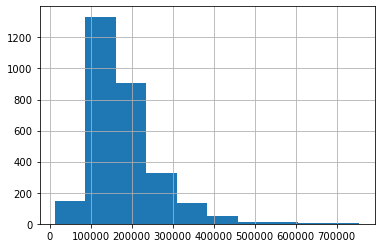

In [274]:
df['SalePrice'].hist()
plt.show()

In [275]:
# Convert PID and Order to Objects
df[['PID','Order']] = object()

## Detecting outliers and dealing with them

In [276]:
#only keep these 3
dfoutliers=df[['Lot Area','Mas Vnr Area','Wood Deck SF']]
dfoutliers= dfoutliers.dropna()


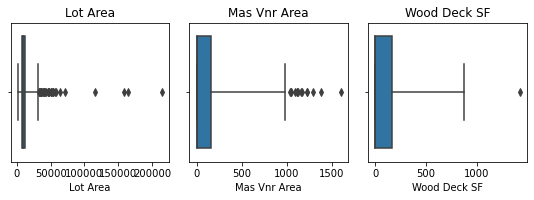

In [277]:
labels=list(dfoutliers.columns)
i=1
plt.figure(figsize=(10,10))
for v in labels:
    plt.subplot(round(len(labels),0)/3+3,4,i)
    sns.boxplot(dfoutliers[v],whis=5)
    plt.title(v)
    i+=1
    

plt.tight_layout()
plt.show()

In [278]:
# Provide a cap for the outliers

In [279]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest().fit(dfoutliers)

dfoutliers['outlier'] = iforest.predict(dfoutliers) 

In [280]:
dfoutliers.head()

,Lot Area,Mas Vnr Area,Wood Deck SF,outlier
0,31770,112.0,210,-1
1,11622,0.0,140,1
2,14267,108.0,393,-1
3,11160,0.0,0,1
4,13830,0.0,212,1


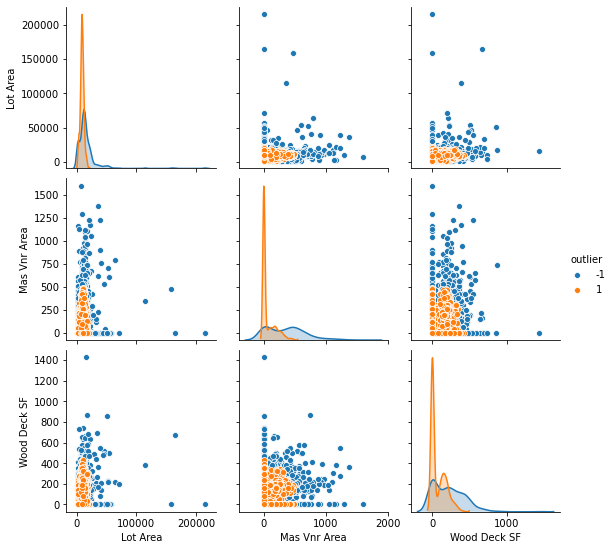

In [281]:
sns.pairplot(data = dfoutliers, hue='outlier')
plt.show()

In [282]:
dfout =dfoutliers.query("outlier == 1").drop("outlier", axis=1)

#****after******
dfout.head()

,Lot Area,Mas Vnr Area,Wood Deck SF
1,11622,0.0,140
3,11160,0.0,0
4,13830,0.0,212
5,9978,20.0,360
6,4920,0.0,0


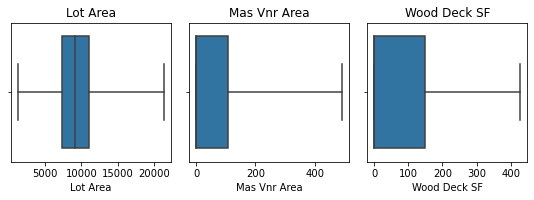

In [283]:
labels=list(dfout.columns)
i=1
plt.figure(figsize=(10,10))
for v in labels:
    plt.subplot(round(len(labels),0)/3+3,4,i)
    sns.boxplot(dfout[v],whis=5)
    plt.title(v)
    i+=1
    

plt.tight_layout()
plt.show()

## Detecting Missing Values and imputing them

In [284]:
df.isna().sum().astype(object)

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: object

In [285]:
df.count().idxmin()

'Pool QC'

In [286]:
checkna=df.isnull().sum()
nacolscounts= checkna[checkna>10]
nacolscounts



Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [287]:
nacols= checkna[checkna>10].index

df[nacols].dtypes

Lot Frontage      float64
Alley              object
Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin Type 2     object
Fireplace Qu       object
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Qual        object
Garage Cond        object
Pool QC            object
Fence              object
Misc Feature       object
dtype: object

In [288]:
df['Lot Frontage'].describe()

count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [289]:
df['Pool QC'].value_counts(dropna=False)

NaN    2917
Ex        4
Gd        4
TA        3
Fa        2
Name: Pool QC, dtype: int64

In [290]:
df['Misc Feature'].value_counts(dropna=False)

NaN     2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: Misc Feature, dtype: int64

Pool QC-Pool quality:
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
 , Misc Feature:Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       None
  Lot Frontage-Linear feet of street connected to property.

In [291]:
# Lot Frontage
df['Lot Frontagemissing']= df['Lot Frontage'].isnull().astype(int)
df.loc[:,['Lot Frontage','Lot Frontagemissing','Street']].head()
#impute based on street 
df['Lot Frontage']=df.groupby(['Street'],sort=False)['Lot Frontage'].apply(lambda x: x.fillna(x.mean()))

In [292]:
df.loc[:,['Lot Frontage','Lot Frontagemissing','Street']].tail()

,Lot Frontage,Lot Frontagemissing,Street
2925,37.000000,0,Pave
2926,69.146502,1,Pave
2927,62.000000,0,Pave
2928,77.000000,0,Pave
2929,74.000000,0,Pave


In [293]:
df['Lot Frontage'].describe()
#df['Lot Frontage'].isna().sum()

count    2930.000000
mean       69.224537
std        21.327312
min        21.000000
25%        60.000000
50%        69.146502
75%        78.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [294]:
#Pool QC
df['Pool QC'].fillna("No Pool",inplace=True)
df['Pool QC'].value_counts(dropna=False)

No Pool    2917
Ex            4
Gd            4
TA            3
Fa            2
Name: Pool QC, dtype: int64

In [295]:
#Misc Feature
df['Misc Feature'].fillna("No Misc Feature",inplace=True)
df['Misc Feature'].value_counts(dropna=False)

No Misc Feature    2824
Shed                 95
Gar2                  5
Othr                  4
Elev                  1
TenC                  1
Name: Misc Feature, dtype: int64

In [296]:
df[['Pool Area','Misc Val']]=df[['Pool Area','Misc Val']]+0.2

In [297]:
df[['Pool Area','Misc Val']].describe()

,Pool Area,Misc Val
count,2930.000000,2930.000000
mean,2.443345,50.835154
std,35.597181,566.344288
min,0.200000,0.200000
25%,0.200000,0.200000
50%,0.200000,0.200000
75%,0.200000,0.200000
max,800.200000,17000.200000


In [298]:
df.drop(df[['Lot Frontagemissing',]],axis=1,inplace=True)

## Skewness and dealing with it

In [299]:
skew_cols= df.skew(axis=0,skipna=True,numeric_only=True).sort_values(ascending=False)
mostskewed=skew_cols[skew_cols>14]
mostskewed

Misc Val     21.999788
Pool Area    16.939142
dtype: float64

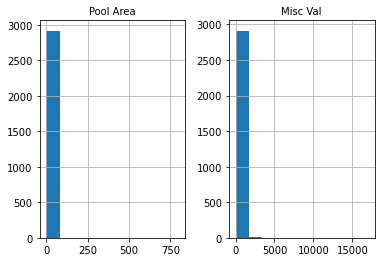

In [300]:
fig = df[['Pool Area','Misc Val']].hist(xlabelsize=10, ylabelsize=10)
[x.title.set_size(10) for x in fig.ravel()]
# show the plot
plt.show()

In [301]:
#Transformations
# Square root
df['Pool Area sqrt']= df['Pool Area'] **(.5)
df['Misc Val sqrt']=df['Misc Val'] **(.5)

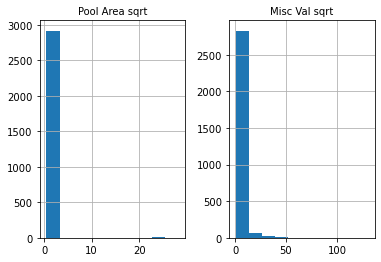

In [302]:
fig = df[['Pool Area sqrt','Misc Val sqrt']].hist(xlabelsize=10, ylabelsize=10)
[x.title.set_size(10) for x in fig.ravel()]
# show the plot
plt.show()

In [303]:
#Transformations
# Reciprical 
df['Pool Area rec']= 1/df['Pool Area']
df['Misc Val rec']=1/df['Misc Val']
df['Misc Val'].describe()

count     2930.000000
mean        50.835154
std        566.344288
min          0.200000
25%          0.200000
50%          0.200000
75%          0.200000
max      17000.200000
Name: Misc Val, dtype: float64

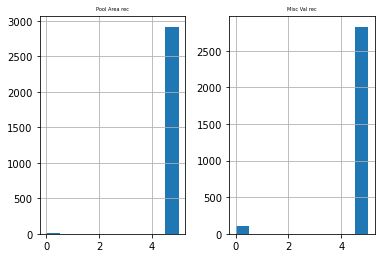

In [304]:
fig = df[['Pool Area rec','Misc Val rec']].hist(xlabelsize=10, ylabelsize=10)
[x.title.set_size(5) for x in fig.ravel()]
# show the plot
plt.show()

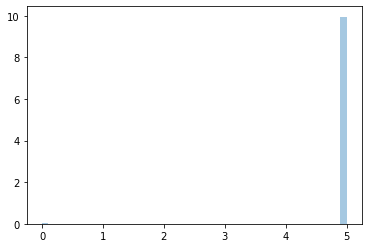

In [305]:
sns.distplot(df[['Pool Area rec']])

In [306]:
#Transformations
# Reciprical 
df['Pool Area log']= np.log(df['Pool Area'])
df['Misc Val log']=np.log(df['Misc Val'])



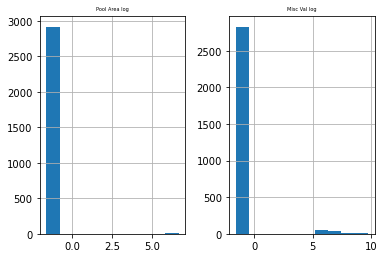

In [307]:
fig = df[['Pool Area log','Misc Val log']].hist(xlabelsize=10, ylabelsize=10)
[x.title.set_size(5) for x in fig.ravel()]
# show the plot
plt.show()

In [308]:
df.drop(df[['Pool Area log','Misc Val log','Misc Val rec','Pool Area rec','Pool Area sqrt','Misc Val sqrt']],axis=1,inplace=True)

In [309]:
#Box cox
#Ana laternative to manually trying  several types of transforations . For each feature, box cox transformations estimate the value 
#lambda from -5 to 5 that acually maximizes the normality of the data 
#For positive lambda values, the feature is transformed to the power of lambda



In [310]:
skewed_features=df[['Pool Area','Misc Val']]
from scipy.stats import boxcox
for i in skewed_features:
    df[i],lmbda=boxcox(df[i],lmbda=None)

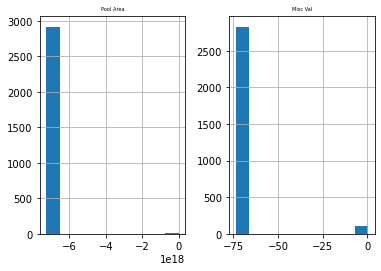

In [311]:
fig = df[['Pool Area','Misc Val']].hist(xlabelsize=10, ylabelsize=10)
[x.title.set_size(5) for x in fig.ravel()]
# show the plot
plt.show()

## Cardinality

In [312]:
dfcat=df.select_dtypes(include=['object'])

In [313]:
#Only check the categoriacl features
dfcat.nunique().sort_values(ascending=False)

Neighborhood      28
Exterior 2nd      17
Exterior 1st      16
Sale Type         10
Condition 1        9
Roof Matl          8
Functional         8
Condition 2        8
House Style        8
MS Zoning          7
Foundation         6
Misc Feature       6
Garage Type        6
Heating            6
BsmtFin Type 2     6
BsmtFin Type 1     6
Sale Condition     6
Roof Style         6
Lot Config         5
Pool QC            5
Garage Cond        5
Garage Qual        5
Fireplace Qu       5
Kitchen Qual       5
Bldg Type          5
Heating QC         5
Electrical         5
Bsmt Cond          5
Bsmt Qual          5
Mas Vnr Type       5
Exter Cond         5
Exter Qual         4
Bsmt Exposure      4
Fence              4
Land Contour       4
Lot Shape          4
Land Slope         3
Paved Drive        3
Garage Finish      3
Utilities          3
Central Air        2
Alley              2
Street             2
PID                1
Order              1
dtype: int64

In [314]:
df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [315]:
dfcardinality=df[['Neighborhood','Exterior 2nd','Exterior 1st']]


### Coverting categorical to numeric
#### 1. Dummy variable encoding

In [316]:
dfneigh = pd.get_dummies(df['Neighborhood'])
#concatenate the dataframes
df4=pd.concat([df,dfneigh],axis=1).reindex(df.index)
#remove the Neighborhood column
df4.drop('Neighborhood',axis=1,inplace=True)


In [317]:
df4[['NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker']].describe()

,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,0.024232,0.056655,0.081570,0.016382,0.051536,0.042662,0.062116,0.017406,0.024573,0.008191
std,0.153795,0.231222,0.273755,0.126962,0.221126,0.202129,0.241407,0.130801,0.154847,0.090149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2. Label Encoding

In [318]:
#df.replace(to_replace={'2Types':'TwoTypes'},value=None,inplace=True)

In [319]:
df['Garage Type'].describe()

count       2773
unique         6
top       Attchd
freq        1731
Name: Garage Type, dtype: object

In [320]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#label= le.fit_transform(df['Garage Type'])

### Onehot encoding

In [321]:
from sklearn.preprocessing import OneHotEncoder
df['Garage Type']=df['Garage Type'].astype('category')
df['Garage_new']=df['Garage Type'].cat.codes

In [322]:
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df[['Garage_new']]).toarray())

In [323]:
#merge with df
new_df=df.join(enc_data)
new_df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Sale Condition,SalePrice,Garage_new,0,1,2,3,4,5,6
0,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,20,RL,141.000000,31770,Pave,NaN,IR1,Lvl,...,Normal,215000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,20,RH,80.000000,11622,Pave,NaN,Reg,Lvl,...,Normal,105000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,20,RL,81.000000,14267,Pave,NaN,IR1,Lvl,...,Normal,172000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,20,RL,93.000000,11160,Pave,NaN,Reg,Lvl,...,Normal,244000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,60,RL,74.000000,13830,Pave,NaN,IR1,Lvl,...,Normal,189900,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,80,RL,37.000000,7937,Pave,NaN,IR1,Lvl,...,Normal,142500,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2926,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,20,RL,69.146502,8885,Pave,NaN,IR1,Low,...,Normal,131000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2927,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,85,RL,62.000000,10441,Pave,NaN,Reg,Lvl,...,Normal,132000,-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2928,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,20,RL,77.000000,10010,Pave,NaN,Reg,Lvl,...,Normal,170000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [324]:
dfgarag = pd.get_dummies(df['Garage Type'])
#concatenate the dataframes
df5=pd.concat([df,dfgarag],axis=1).reindex(df.index)
#remove the Garage column
df5.drop('Garage Type',axis=1,inplace=True)
df5.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Sale Type,Sale Condition,SalePrice,Garage_new,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
0,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,WD,Normal,215000,1,0,1,0,0,0,0
1,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,WD,Normal,105000,1,0,1,0,0,0,0
2,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,WD,Normal,172000,1,0,1,0,0,0,0
3,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,WD,Normal,244000,1,0,1,0,0,0,0
4,<object object at 0x00000236853A88B0>,<object object at 0x00000236853A88B0>,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,WD,Normal,189900,1,0,1,0,0,0,0


In [325]:
df5[['Attchd','Basment','BuiltIn','CarPort','Detchd','2Types']].describe()

,Attchd,Basment,BuiltIn,CarPort,Detchd,2Types
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,0.590785,0.012287,0.063481,0.005119,0.266894,0.007850
std,0.491773,0.110181,0.243868,0.071379,0.442412,0.088266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Bivariate Analysis

In [326]:
#('MS Zoning', 'Foundation','Garage Type') versus the 'SalePrice

In [327]:
#confirm data types -categorical
df[['MS Zoning', 'Foundation','Garage Type']].describe()

,MS Zoning,Foundation,Garage Type
count,2930,2930,2773
unique,7,6,6
top,RL,PConc,Attchd
freq,2273,1310,1731


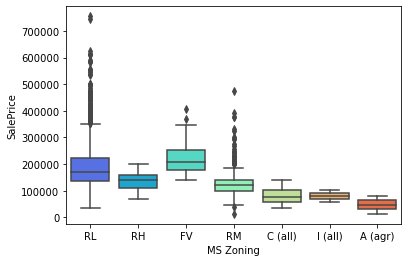

In [364]:
#MS Zoning vs Sale Price
#df.boxplot(figsize=(10,10))

sns.boxplot(x='MS Zoning',y='SalePrice',data=df,palette='rainbow')
plt.show()

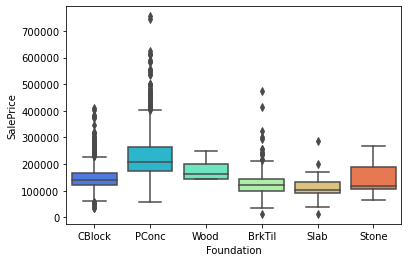

In [361]:
sns.boxplot(x='Foundation',y='SalePrice',data=df,palette='rainbow')
plt.show()


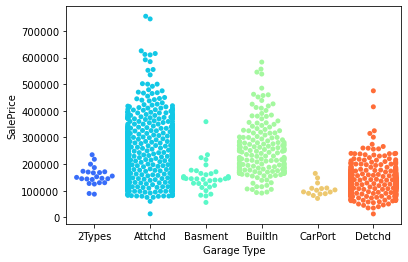

In [362]:
sns.swarmplot(x='Garage Type',y='SalePrice',data=df,palette='rainbow')
plt.show()

In [332]:
df['MS Zoning'].value_counts(dropna=False)

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64

# PCA - Principal Component Analysis


In [387]:
X=pd.DataFrame(df.select_dtypes(exclude=['object','category','float64']))

X.drop('SalePrice',axis=1,inplace=True)


X.describe()
X.info()
X.shape
X.head(5)



from sklearn.preprocessing import StandardScaler

scale= StandardScaler()  #gets z scores
X_scaled= scale.fit_transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MS SubClass      2930 non-null   int64
 1   Lot Area         2930 non-null   int64
 2   Overall Qual     2930 non-null   int64
 3   Overall Cond     2930 non-null   int64
 4   Year Built       2930 non-null   int64
 5   Year Remod/Add   2930 non-null   int64
 6   1st Flr SF       2930 non-null   int64
 7   2nd Flr SF       2930 non-null   int64
 8   Low Qual Fin SF  2930 non-null   int64
 9   Gr Liv Area      2930 non-null   int64
 10  Full Bath        2930 non-null   int64
 11  Half Bath        2930 non-null   int64
 12  Bedroom AbvGr    2930 non-null   int64
 13  Kitchen AbvGr    2930 non-null   int64
 14  TotRms AbvGrd    2930 non-null   int64
 15  Fireplaces       2930 non-null   int64
 16  Wood Deck SF     2930 non-null   int64
 17  Open Porch SF    2930 non-null   int64
 18  Enclosed

In [388]:
y=df['SalePrice']
y.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [389]:
#get 2 principal components
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,0.591038,-0.969707
1,-2.686729,-0.966464
2,-0.606579,-0.461700
3,2.111123,-0.563134
4,1.147015,-0.113201


In [390]:
X_scaled.shape

(2930, 24)

In [391]:
X_pca.shape

(2930, 2)

Dimension reduction has occured

In [374]:
#X_pca.explained_variance_ratio_

In [394]:
pca2.explained_variance_ratio_

array([0.20772805, 0.10564819])

Text(0, 0.5, 'Second Principal Component')

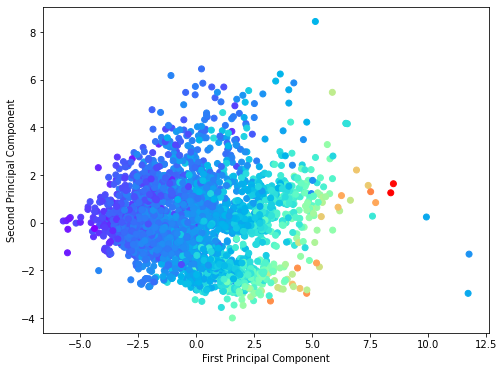

In [393]:
#Ploting the components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=df['SalePrice'],cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Te plot shows that using the first and the second principal components, we can somehow be able to split the Sale Price column

In [397]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

principalDf = pd.DataFrame(data = X_pca3, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,21626.141126,373.250618,280.380965
1,1457.666538,753.832237,-153.499955
2,4117.615595,357.460746,241.019167
3,1037.895950,-471.399293,1045.140930
4,3680.412238,-193.888225,-422.117959


In [398]:
pca3.explained_variance_ratio_

array([0.99063033, 0.00576919, 0.00308869])

Text(0, 0.5, 'Second Principal Component')

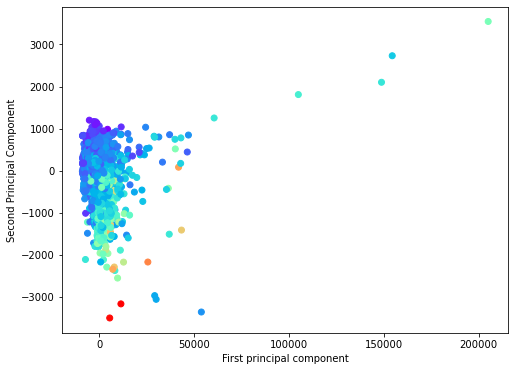

In [403]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca3[:,0],X_pca3[:,1],c=df['SalePrice'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### How many PCA components to capture over 80% of the variation?????

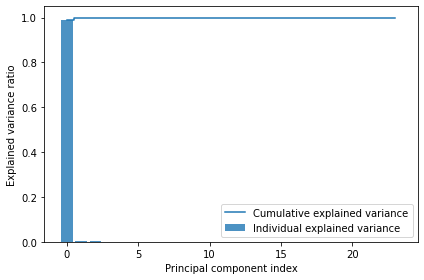

In [406]:
pca = PCA()
#
# Determine transformed features
#
X_pca4 = pca.fit_transform(X)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()